#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
duplicate_rows = df[df.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("True")
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("False.")

True
Duplicate Rows:
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica


Periksa apakah ada missing values

In [4]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("True")
    print("Columns with Missing Values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in any column.")

No missing values found in any column.


Periksa outlier dengan boxplot untuk setiap kolom feature

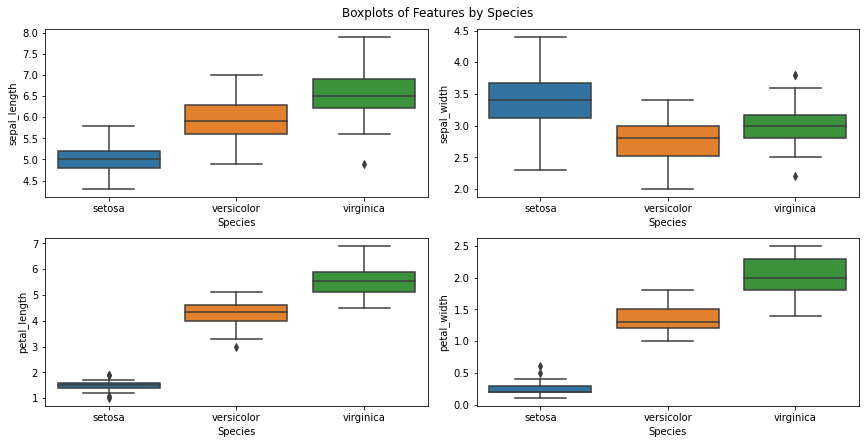

In [18]:
plt.figure(figsize=(12, 6))

feature_columns = df.columns[:-1]

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=df)
    plt.ylabel(feature)
    plt.xlabel('Species')
plt.tight_layout()
plt.suptitle('Boxplots of Features by Species', y=1.02)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [19]:
# Independent variables (features)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Dependent variable (target)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [24]:
model = LogisticRegression(random_state=0)

Uji model dengan dataset test

In [34]:
model.fit(X_train_scaled, y_train)
predicted_labels = model.predict(X_test_scaled)
print(predicted_labels)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


In [35]:
confusion = confusion_matrix(y_test, predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)

print("Confusion Matrix:")
print(confusion)
print(f'Accuracy Score: {accuracy:.2f}')

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.00


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [31]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

Uji hasil model dengan data test

In [33]:
nb_predictions = nb_model.predict(X_test_scaled)
print(nb_predictions)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [36]:
confusion_nb = confusion_matrix(y_test, nb_predictions)
accuracy_nb = accuracy_score(y_test, nb_predictions)

print("Confusion Matrix:")
print(confusion_nb)
print(f'Accuracy Score: {accuracy_nb:.2f}')

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.00


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [38]:
knn_model = KNeighborsClassifier(metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [39]:
knn_predictions = knn_model.predict(X_test_scaled)
print(knn_predictions)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [40]:
confusion_knn = confusion_matrix(y_test, knn_predictions)
accuracy_knn = accuracy_score(y_test, knn_predictions)

print("Confusion Matrix:")
print(confusion_knn)
print(f'Accuracy Score: {accuracy_knn:.2f}')

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.00


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah semuanya